# ▶️ YouTube Video Analysis
### Author: Aston Crawley

In [1]:
# ============== 1. Setup ==============
# Import libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS
import emoji
from collections import Counter
import plotly.graph_objects as go
from plotly.offline import iplot

In [2]:
# ============== 2. Data Loading ==============
# Load YouTube US comments data skipping corrupted rows
df = pd.read_csv(os.path.join("..", "data", "UScomments.csv"), on_bad_lines = "skip")

/var/folders/kh/hv0681hd5n1bnsmh2y16qm3h0000gn/T/ipykernel_40093/3473035399.py:3: DtypeWarning:

Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.



In [3]:
# Preview data
print(df.head())
print(df.info())
print(df.describe())

      video_id                                       comment_text likes  \
0  XpVt6Z1Gjjo                  Logan Paul it's yo big day ‼️‼️‼️     4   
1  XpVt6Z1Gjjo  I've been following you from the start of your...     3   
2  XpVt6Z1Gjjo                 Say hi to Kong and maverick for me     3   
3  XpVt6Z1Gjjo                                MY FAN . attendance     3   
4  XpVt6Z1Gjjo                                         trending 😉     3   

  replies  
0       0  
1       0  
2       0  
3       0  
4       0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 691400 entries, 0 to 691399
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   video_id      691400 non-null  object
 1   comment_text  691374 non-null  object
 2   likes         691400 non-null  object
 3   replies       691400 non-null  object
dtypes: object(4)
memory usage: 21.1+ MB
None
           video_id comment_text   likes  replies
count        

In [ ]:
# ============== 3. Data Cleaning ==============
# Check for missing values
print(df.isnull().values.any())

# Check location and quantity of missing values
print(df.isnull().sum())

# Handle missing values
df.dropna(inplace = True)

In [ ]:
# ============== 4. Exploratory Data Analysis (EDA) ==============
# Sentiment analysis
sia = SentimentIntensityAnalyzer()

# Generate comment polarity score
df['polarity'] = df['comment_text'].apply(lambda x: sia.polarity_scores(str(x))['compound'])

In [ ]:
df.head()

In [ ]:
# Wordcloud analysis

# Get positive comments based on polarity score
filter_pos = df['polarity'] >= 0.8
comments_pos = df[filter_pos]
comments_pos.shape

In [ ]:
# Join all comments into a single string
all_positive_comments = ' '.join(comments_pos['comment_text'])

In [ ]:
# Get negative comments based on polarity score
filter_neg = df['polarity'] <= -0.8
comments_neg = df[filter_neg]
comments_neg.shape

In [ ]:
# Join all comments into a single string
all_negative_comments = ' '.join(comments_neg['comment_text'])

In [ ]:
# Get keywords from all positive comments
wordcloud_pos = WordCloud(stopwords = set(STOPWORDS)).generate(all_positive_comments)

In [ ]:
# Generate positive comments wordcloud
plt.imshow(wordcloud_pos)
plt.axis("off")

In [ ]:
# Get keywords from all negative comments
wordcloud_neg = WordCloud(stopwords = set(STOPWORDS)).generate(all_negative_comments)

In [ ]:
# Generate negative comments wordcloud
plt.imshow(wordcloud_neg)
plt.axis("off")

In [ ]:
# Emoji analysis

# Get list of all emojis in comments
all_emojis = []

for comment in df['comment_text']:
    emoji_info = emoji.emoji_list(comment)
    emojis_found = [item['emoji'] for item in emoji_info]
    all_emojis.extend(emojis_found)

In [ ]:
# Filter the top 10 most used emojis
emojis_count_list_top10 = Counter(all_emojis).most_common(10)

In [ ]:
# Create a list of emojis with their respective counts
emojis = [emoji for emoji, _ in emojis_count_list_top10]
counts = [count for _, count in emojis_count_list_top10]

In [ ]:
# Plot emoji frequency using Plotly
iplot([go.Bar(x = emojis, y = counts)])

In [4]:
# Compile multiple data sources

# Get all files in the additional_data directory
files = os.listdir(os.path.join("..", "data", "additional_data"))

In [5]:
# Get list of CSV files
files_csv = [file for file in files if file.endswith(".csv")]

In [6]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [7]:
# Create empty dataframe to hold all data
full_df = pd.DataFrame()

# Loop through all CSV files and concatenate them into a single dataframe
for file in files_csv:
    current_df = pd.read_csv(os.path.join("..", "data", "additional_data", file), encoding='iso-8859-1', on_bad_lines="skip")
    full_df = pd.concat([full_df, current_df], ignore_index=True)

In [8]:
full_df.shape

(375942, 16)

In [31]:
# Check for duplicate data
full_df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
375937    False
375938    False
375939    False
375940    False
375941    False
Length: 339525, dtype: bool

In [32]:
full_df[full_df.duplicated()].shape

(0, 20)

In [11]:
# Drop duplicated data
full_df = full_df.drop_duplicates()
full_df.shape

(339525, 16)

In [ ]:
# Start of exploring

In [ ]:
# Exploratory data cleaning
full_df["video_id"].value_counts()

video_id
#NAME?         2119
tCXGJQYZ9JA      67
iWZmdoY1aTE      66
YBpdL9hSac4      65
ffxKSjUwKdU      64
               ... 
Dhhp8M5K3UI       1
yhdI98_O-Xc       1
kTT472QeJGg       1
rZZEeeAVgog       1
cOJ68MQm2ac       1
Name: count, Length: 184287, dtype: int64

In [46]:
full_df[full_df["video_id"] == '#NAME?'].sort_values(by = "trending_date", ascending = False)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name,like_rate,dislike_rate,comment_count_rate
255345,#NAME?,2018-06-14,ASMR Ear Licking ~ Extreme Mouth Sounds for Ti...,FrivolousFox ASMR,22,2018-06-13T00:29:23.000Z,"ASMR|""frivvifox""|""fortnite""|""gaming""|""eating""|...",317655,13427,346,2205,https://i.ytimg.com/vi/-BdSCcmJKJk/default.jpg,False,False,False,https://www.gettingles.com ! I'll be filming a...,People & Blogs,4.226913,0.108923,0.694149
40419,#NAME?,2018-06-14,Con un aro y movimiento de caderas. subiÃ³ la ...,Venga La AlegrÃ­a,24,2018-06-13T14:00:01.000Z,"juegos de la jefa|""los juegos de la jefa jessy...",13385,166,8,18,https://i.ytimg.com/vi/-ymWyl7yALQ/default.jpg,False,False,False,Liz LombÃ³ pone a todas a mover la cadera en V...,Entertainment,1.240194,0.059768,0.134479
255277,#NAME?,2018-06-14,ÐÐ¢ÐÐÐ§ÐÐ«Ð ÐÐÐÐÐ¡Ð¢Ð ÐÐÐ¯ ÐÐÐÐ...,TOP TIP TOP MMA,17,2018-06-13T13:00:55.000Z,"ÐºÐ¾Ð½Ð¾Ñ|""Ð¼Ð°ÐºÐ³ÑÐµÐ³Ð¾Ñ""|""ÑÑÐ´""|""ÑÑ...",113638,2650,177,606,https://i.ytimg.com/vi/-wY9vkhwuUw/default.jpg,False,False,False,ÐÐ°Ð½Ð°Ð» 1xbet - https://goo.gl/pz6TmJhttp:/...,Sports,2.331966,0.155758,0.533272
77653,#NAME?,2018-06-14,Dumbo Official Teaser Trailer,Disney Movie Trailers,1,2018-06-13T07:00:00.000Z,"Disney|""Walt Disney Studios""|""Dumbo""|""Flying E...",4427381,96391,5508,12726,https://i.ytimg.com/vi/-QPdRfqTnt4/default.jpg,False,False,False,Watch the teaser trailer for Tim Burtonâs al...,Film & Animation,2.177156,0.124408,0.287439
77645,#NAME?,2018-06-14,#DeepthiSunaina Cheema joke chepthe navvali..N...,Star Maa,24,2018-06-12T05:44:19.000Z,"comedy|""action""|""entertainment""|""telugu""|""toll...",1014376,5974,1414,1132,https://i.ytimg.com/vi/-fKW38f_0Hk/default.jpg,False,False,False,#BiggBossTelugu2,Entertainment,0.588933,0.139396,0.111596
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214738,#NAME?,2017-11-14,HextraCoin â Ð¸Ð½Ð²ÐµÑÑÐ¸ÑÐ¸Ñ 1100$ Ð² Ð...,ÐÑÐ¸Ð¿ÑÐ¾ÐÐ¸Ñ Ð¾ÑÐ°Ð´ÐºÐ°,27,2017-11-13T15:37:05.000Z,"hextracoin|""hextra coin""|""hextracoin lending""|...",4606,178,3,20,https://i.ytimg.com/vi/-WusEl400qw/default.jpg,False,False,False,ð Ð¡ÑÑÐ»ÐºÐ° Ð´Ð»Ñ ÑÐµÐ³Ð¸ÑÑÑÐ°ÑÐ¸Ð...,Education,3.864525,0.065132,0.434216
40624,#NAME?,2017-11-14,à¤à¥à¤à¤­ à¤°à¤¾à¤¶à¤¿ à¤µà¤¾à¤²à¥à¤ à¤à...,Jansatta,25,2017-11-11T09:09:06.000Z,"à¤à¥à¤à¤­ à¤°à¤¾à¤¶à¤¿|""Astro""|""rashi""|""à¤...",30659,180,36,3,https://i.ytimg.com/vi/-BcG_jN6DgE/default.jpg,False,False,False,NaN,News & Politics,0.587103,0.117421,0.009785
40640,#NAME?,2017-11-14,à¤à¤° à¤®à¥à¤ à¤à¥à¤ªà¤à¤¾à¤ª à¤¯à¤¹à¤¾à...,Health Tips for You,26,2017-11-08T12:27:17.000Z,"tona totka|""tone""|""laal kitaab""|""lal kitaab""|""...",743321,2570,1154,294,https://i.ytimg.com/vi/-kj6W27Jj-8/default.jpg,False,False,False,à¤à¤° à¤®à¥à¤ à¤à¥à¤ªà¤à¤¾à¤ª à¤¯à¤¹à¤¾à...,Howto & Style,0.345746,0.155249,0.039552
86,#NAME?,2017-11-14,Momentos del terremoto en Irak,RED,22,2017-11-12T20:41:20.000Z,[none],9409,24,2,3,https://i.ytimg.com/vi/-_37ePCCoBc/default.jpg,False,False,False,NaN,People & Blogs,0.255075,0.021256,0.031884


In [ ]:
full_df[full_df["video_id"] == 'tCXGJQYZ9JA'].sort_values(by = "trending_date", ascending = False)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name,like_rate,dislike_rate,comment_count_rate
366180,tCXGJQYZ9JA,2018-04-17,Taylor Swift - Delicate,TaylorSwiftVEVO,10,2018-03-12T01:15:10.000Z,"Taylor Swift|""Delicate""|""Big""|""Machine""|""Recor...",117270304,2161260,133428,175635,https://i.ytimg.com/vi/tCXGJQYZ9JA/default.jpg,False,False,False,Taylor Swift reputation Stadium Tour Tickets a...,Music,1.842973,0.113778,0.149769
366000,tCXGJQYZ9JA,2018-04-16,Taylor Swift - Delicate,TaylorSwiftVEVO,10,2018-03-12T01:15:10.000Z,"Taylor Swift|""Delicate""|""Big""|""Machine""|""Recor...",115702570,2155243,132912,175264,https://i.ytimg.com/vi/tCXGJQYZ9JA/default.jpg,False,False,False,Taylor Swift reputation Stadium Tour Tickets a...,Music,1.862744,0.114874,0.151478
365817,tCXGJQYZ9JA,2018-04-15,Taylor Swift - Delicate,TaylorSwiftVEVO,10,2018-03-12T01:15:10.000Z,"Taylor Swift|""Delicate""|""Big""|""Machine""|""Recor...",114097773,2148166,132354,174955,https://i.ytimg.com/vi/tCXGJQYZ9JA/default.jpg,False,False,False,Taylor Swift reputation Stadium Tour Tickets a...,Music,1.882741,0.116001,0.153338
365626,tCXGJQYZ9JA,2018-04-14,Taylor Swift - Delicate,TaylorSwiftVEVO,10,2018-03-12T01:15:10.000Z,"Taylor Swift|""Delicate""|""Big""|""Machine""|""Recor...",112666063,2141951,131834,174640,https://i.ytimg.com/vi/tCXGJQYZ9JA/default.jpg,False,False,False,Taylor Swift reputation Stadium Tour Tickets a...,Music,1.901150,0.117013,0.155007
365395,tCXGJQYZ9JA,2018-04-07,Taylor Swift - Delicate,TaylorSwiftVEVO,10,2018-03-12T01:15:10.000Z,"Taylor Swift|""Delicate""|""Big""|""Machine""|""Recor...",99019402,2082594,127190,171478,https://i.ytimg.com/vi/tCXGJQYZ9JA/default.jpg,False,False,False,Taylor Swift reputation Stadium Tour Tickets a...,Music,2.103218,0.128450,0.173176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196859,tCXGJQYZ9JA,2018-03-12,Taylor Swift - Delicate,TaylorSwiftVEVO,10,2018-03-12T01:15:10.000Z,"Taylor Swift|""Delicate""|""Big""|""Machine""|""Recor...",3326090,443504,12998,52214,https://i.ytimg.com/vi/tCXGJQYZ9JA/default.jpg,False,False,False,Music video by Taylor Swift performing Delicat...,Music,13.334095,0.390789,1.569831
237868,tCXGJQYZ9JA,2018-03-12,Taylor Swift - Delicate,TaylorSwiftVEVO,10,2018-03-12T01:15:10.000Z,"Taylor Swift|""Delicate""|""Big""|""Machine""|""Recor...",3326090,443553,12998,52226,https://i.ytimg.com/vi/tCXGJQYZ9JA/default.jpg,False,False,False,Music video by Taylor Swift performing Delicat...,Music,13.335568,0.390789,1.570192
278659,tCXGJQYZ9JA,2018-03-12,Taylor Swift - Delicate,TaylorSwiftVEVO,10,2018-03-12T01:15:10.000Z,"Taylor Swift""|""Delicate""|""Big""|""Machine""|""Reco...",3326090,443530,12998,52219,https://i.ytimg.com/vi/tCXGJQYZ9JA/default.jpg,False,False,False,Music video by Taylor Swift performing Delicat...,Music,13.334877,0.390789,1.569982
360198,tCXGJQYZ9JA,2018-03-12,Taylor Swift - Delicate,TaylorSwiftVEVO,10,2018-03-12T01:15:10.000Z,"Taylor Swift|""Delicate""|""Big""|""Machine""|""Recor...",3326090,443464,12996,52209,https://i.ytimg.com/vi/tCXGJQYZ9JA/default.jpg,False,False,False,Music video by Taylor Swift performing Delicat...,Music,13.332892,0.390729,1.569681


In [37]:
full_df["trending_date"] = pd.to_datetime(full_df["trending_date"], format = "%y.%d.%m")

In [42]:
delicate_df = full_df[full_df["video_id"] == 'tCXGJQYZ9JA']
delicate_df.sort_values(by = ["trending_date", "views", "likes"], ascending = False)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name,like_rate,dislike_rate,comment_count_rate
366180,tCXGJQYZ9JA,2018-04-17,Taylor Swift - Delicate,TaylorSwiftVEVO,10,2018-03-12T01:15:10.000Z,"Taylor Swift|""Delicate""|""Big""|""Machine""|""Recor...",117270304,2161260,133428,175635,https://i.ytimg.com/vi/tCXGJQYZ9JA/default.jpg,False,False,False,Taylor Swift reputation Stadium Tour Tickets a...,Music,1.842973,0.113778,0.149769
366000,tCXGJQYZ9JA,2018-04-16,Taylor Swift - Delicate,TaylorSwiftVEVO,10,2018-03-12T01:15:10.000Z,"Taylor Swift|""Delicate""|""Big""|""Machine""|""Recor...",115702570,2155243,132912,175264,https://i.ytimg.com/vi/tCXGJQYZ9JA/default.jpg,False,False,False,Taylor Swift reputation Stadium Tour Tickets a...,Music,1.862744,0.114874,0.151478
365817,tCXGJQYZ9JA,2018-04-15,Taylor Swift - Delicate,TaylorSwiftVEVO,10,2018-03-12T01:15:10.000Z,"Taylor Swift|""Delicate""|""Big""|""Machine""|""Recor...",114097773,2148166,132354,174955,https://i.ytimg.com/vi/tCXGJQYZ9JA/default.jpg,False,False,False,Taylor Swift reputation Stadium Tour Tickets a...,Music,1.882741,0.116001,0.153338
365626,tCXGJQYZ9JA,2018-04-14,Taylor Swift - Delicate,TaylorSwiftVEVO,10,2018-03-12T01:15:10.000Z,"Taylor Swift|""Delicate""|""Big""|""Machine""|""Recor...",112666063,2141951,131834,174640,https://i.ytimg.com/vi/tCXGJQYZ9JA/default.jpg,False,False,False,Taylor Swift reputation Stadium Tour Tickets a...,Music,1.901150,0.117013,0.155007
365395,tCXGJQYZ9JA,2018-04-07,Taylor Swift - Delicate,TaylorSwiftVEVO,10,2018-03-12T01:15:10.000Z,"Taylor Swift|""Delicate""|""Big""|""Machine""|""Recor...",99019402,2082594,127190,171478,https://i.ytimg.com/vi/tCXGJQYZ9JA/default.jpg,False,False,False,Taylor Swift reputation Stadium Tour Tickets a...,Music,2.103218,0.128450,0.173176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23135,tCXGJQYZ9JA,2018-03-12,Taylor Swift - Delicate,TaylorSwiftVEVO,10,2018-03-12T01:15:10.000Z,"Taylor Swift|""Delicate""|""Big""|""Machine""|""Recor...",3326090,443586,13001,52226,https://i.ytimg.com/vi/tCXGJQYZ9JA/default.jpg,False,False,False,Music video by Taylor Swift performing Delicat...,Music,13.336560,0.390879,1.570192
237868,tCXGJQYZ9JA,2018-03-12,Taylor Swift - Delicate,TaylorSwiftVEVO,10,2018-03-12T01:15:10.000Z,"Taylor Swift|""Delicate""|""Big""|""Machine""|""Recor...",3326090,443553,12998,52226,https://i.ytimg.com/vi/tCXGJQYZ9JA/default.jpg,False,False,False,Music video by Taylor Swift performing Delicat...,Music,13.335568,0.390789,1.570192
278659,tCXGJQYZ9JA,2018-03-12,Taylor Swift - Delicate,TaylorSwiftVEVO,10,2018-03-12T01:15:10.000Z,"Taylor Swift""|""Delicate""|""Big""|""Machine""|""Reco...",3326090,443530,12998,52219,https://i.ytimg.com/vi/tCXGJQYZ9JA/default.jpg,False,False,False,Music video by Taylor Swift performing Delicat...,Music,13.334877,0.390789,1.569982
196859,tCXGJQYZ9JA,2018-03-12,Taylor Swift - Delicate,TaylorSwiftVEVO,10,2018-03-12T01:15:10.000Z,"Taylor Swift|""Delicate""|""Big""|""Machine""|""Recor...",3326090,443504,12998,52214,https://i.ytimg.com/vi/tCXGJQYZ9JA/default.jpg,False,False,False,Music video by Taylor Swift performing Delicat...,Music,13.334095,0.390789,1.569831


In [43]:
# Remove duplicate dates for the same video
delicate_df = delicate_df.drop_duplicates(subset = ["trending_date"], keep = "first")

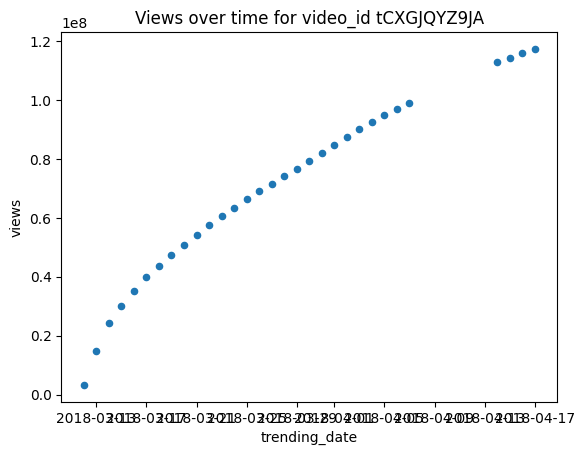

In [53]:
delicate_df.plot(kind="scatter", x = "trending_date", y = "views", marker = 'o', title = "Views over time for video_id tCXGJQYZ9JA")
plt.show()

In [82]:
# Define the non-linear function to fit
def exponential_growth(x, a, b, c):
    """
    An exponential growth function: y = a * exp(b * x) + c
    a: amplitude
    b: growth constant
    c: offset
    """
    return a * np.exp(b * x) + c

def quadratic(x, a, b, c):
    """
    A quadratic function: y = ax^2 + bx + c
    a: quadratic coefficient
    b: linear coefficient
    c: constant term
    """
    return a * x**2 + b * x + c

def logarithmic(x, a, b, c):
    """
    A logarithmic function: y = a * log(b * x)
    a: amplitude
    b: scaling factor
    c: offset
    """
    return a * np.log(b * x) + c

In [55]:
from scipy.optimize import curve_fit

In [66]:
test_average = full_df.groupby("video_id")["views"].mean()
print(type(test_average))
test_average.values

<class 'pandas.core.series.Series'>


array([537752.22935347, 168135.85714286,  30914.        , ...,
        62134.        ,   6586.5       ,  19190.        ], shape=(184287,))

In [76]:
delicate_df.reset_index(inplace = True)
delicate_df

,trending_date,video_id,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name,like_rate,dislike_rate,comment_count_rate
0,2018-03-12,tCXGJQYZ9JA,Taylor Swift - Delicate,TaylorSwiftVEVO,10,2018-03-12T01:15:10.000Z,"Taylor Swift|""Delicate""|""Big""|""Machine""|""Recor...",3326090,443586,13001,52226,https://i.ytimg.com/vi/tCXGJQYZ9JA/default.jpg,False,False,False,Music video by Taylor Swift performing Delicat...,Music,13.336560,0.390879,1.570192
1,2018-03-13,tCXGJQYZ9JA,Taylor Swift - Delicate,TaylorSwiftVEVO,10,2018-03-12T01:15:10.000Z,"Taylor Swift|""Delicate""|""Big""|""Machine""|""Recor...",14820746,983732,44259,97510,https://i.ytimg.com/vi/tCXGJQYZ9JA/default.jpg,False,False,False,Music video by Taylor Swift performing Delicat...,Music,6.637534,0.298629,0.657929
2,2018-03-14,tCXGJQYZ9JA,Taylor Swift - Delicate,TaylorSwiftVEVO,10,2018-03-12T01:15:10.000Z,"Taylor Swift|""Delicate""|""Big""|""Machine""|""Recor...",24262331,1249421,64943,121243,https://i.ytimg.com/vi/tCXGJQYZ9JA/default.jpg,False,False,False,Taylor Swift reputation Stadium Tour Tickets a...,Music,5.149633,0.267670,0.499717
3,2018-03-15,tCXGJQYZ9JA,Taylor Swift - Delicate,TaylorSwiftVEVO,10,2018-03-12T01:15:10.000Z,"Taylor Swift|""Delicate""|""Big""|""Machine""|""Recor...",29923522,1395751,76071,133691,https://i.ytimg.com/vi/tCXGJQYZ9JA/default.jpg,False,False,False,Taylor Swift reputation Stadium Tour Tickets a...,Music,4.664394,0.254218,0.446776
4,2018-03-16,tCXGJQYZ9JA,Taylor Swift - Delicate,TaylorSwiftVEVO,10,2018-03-12T01:15:10.000Z,"Taylor Swift|""Delicate""|""Big""|""Machine""|""Recor...",35218973,1506790,84074,140396,https://i.ytimg.com/vi/tCXGJQYZ9JA/default.jpg,False,False,False,Taylor Swift reputation Stadium Tour Tickets a...,Music,4.278347,0.238718,0.398637
5,2018-03-17,tCXGJQYZ9JA,Taylor Swift - Delicate,TaylorSwiftVEVO,10,2018-03-12T01:15:10.000Z,"Taylor Swift|""Delicate""|""Big""|""Machine""|""Recor...",39770100,1592490,89677,145338,https://i.ytimg.com/vi/tCXGJQYZ9JA/default.jpg,False,False,False,Taylor Swift reputation Stadium Tour Tickets a...,Music,4.004239,0.225488,0.365445
6,2018-03-18,tCXGJQYZ9JA,Taylor Swift - Delicate,TaylorSwiftVEVO,10,2018-03-12T01:15:10.000Z,"Taylor Swift|""Delicate""|""Big""|""Machine""|""Recor...",43738208,1658756,94043,148548,https://i.ytimg.com/vi/tCXGJQYZ9JA/default.jpg,False,False,False,Taylor Swift reputation Stadium Tour Tickets a...,Music,3.792464,0.215013,0.339630
7,2018-03-19,tCXGJQYZ9JA,Taylor Swift - Delicate,TaylorSwiftVEVO,10,2018-03-12T01:15:10.000Z,"Taylor Swift|""Delicate""|""Big""|""Machine""|""Recor...",47247436,1706733,97482,151269,https://i.ytimg.com/vi/tCXGJQYZ9JA/default.jpg,False,False,False,Taylor Swift reputation Stadium Tour Tickets a...,Music,3.612329,0.206322,0.320163
8,2018-03-20,tCXGJQYZ9JA,Taylor Swift - Delicate,TaylorSwiftVEVO,10,2018-03-12T01:15:10.000Z,"Taylor Swift|""Delicate""|""Big""|""Machine""|""Recor...",50807655,1743672,100344,153489,https://i.ytimg.com/vi/tCXGJQYZ9JA/default.jpg,False,False,False,Taylor Swift reputation Stadium Tour Tickets a...,Music,3.431908,0.197498,0.302098
9,2018-03-21,tCXGJQYZ9JA,Taylor Swift - Delicate,TaylorSwiftVEVO,10,2018-03-12T01:15:10.000Z,"Taylor Swift|""Delicate""|""Big""|""Machine""|""Recor...",54230077,1780807,103114,156029,https://i.ytimg.com/vi/tCXGJQYZ9JA/default.jpg,False,False,False,Taylor Swift reputation Stadium Tour Tickets a...,Music,3.283800,0.190142,0.287717


In [77]:
vid_df = delicate_df
vid_df['years'] = (vid_df['trending_date'] - vid_df['trending_date'].min()).dt.days / 365.0
vid_df.set_index("years", inplace = True)
new_df = vid_df["views"]
print(type(new_df))
new_df.index

# vid_df = delicate_df[["trending_date", "views"]]
# vid_df.set_index("trending_date", inplace = True)
# print(type(vid_df))
# vid_df.values

<class 'pandas.core.series.Series'>


Index([                  0.0, 0.0027397260273972603,  0.005479452054794521,
         0.00821917808219178,  0.010958904109589041,    0.0136986301369863,
         0.01643835616438356,  0.019178082191780823,  0.021917808219178082,
        0.024657534246575342,    0.0273972602739726,  0.030136986301369864,
         0.03287671232876712,   0.03561643835616438,  0.038356164383561646,
          0.0410958904109589,  0.043835616438356165,   0.04657534246575343,
        0.049315068493150684,  0.052054794520547946,    0.0547945205479452,
        0.057534246575342465,   0.06027397260273973,   0.06301369863013699,
         0.06575342465753424,    0.0684931506849315,   0.07123287671232877,
         0.09041095890410959,   0.09315068493150686,    0.0958904109589041,
         0.09863013698630137],
      dtype='float64', name='years')

In [78]:
new_df.index

Index([                  0.0, 0.0027397260273972603,  0.005479452054794521,
         0.00821917808219178,  0.010958904109589041,    0.0136986301369863,
         0.01643835616438356,  0.019178082191780823,  0.021917808219178082,
        0.024657534246575342,    0.0273972602739726,  0.030136986301369864,
         0.03287671232876712,   0.03561643835616438,  0.038356164383561646,
          0.0410958904109589,  0.043835616438356165,   0.04657534246575343,
        0.049315068493150684,  0.052054794520547946,    0.0547945205479452,
        0.057534246575342465,   0.06027397260273973,   0.06301369863013699,
         0.06575342465753424,    0.0684931506849315,   0.07123287671232877,
         0.09041095890410959,   0.09315068493150686,    0.0958904109589041,
         0.09863013698630137],
      dtype='float64', name='years')

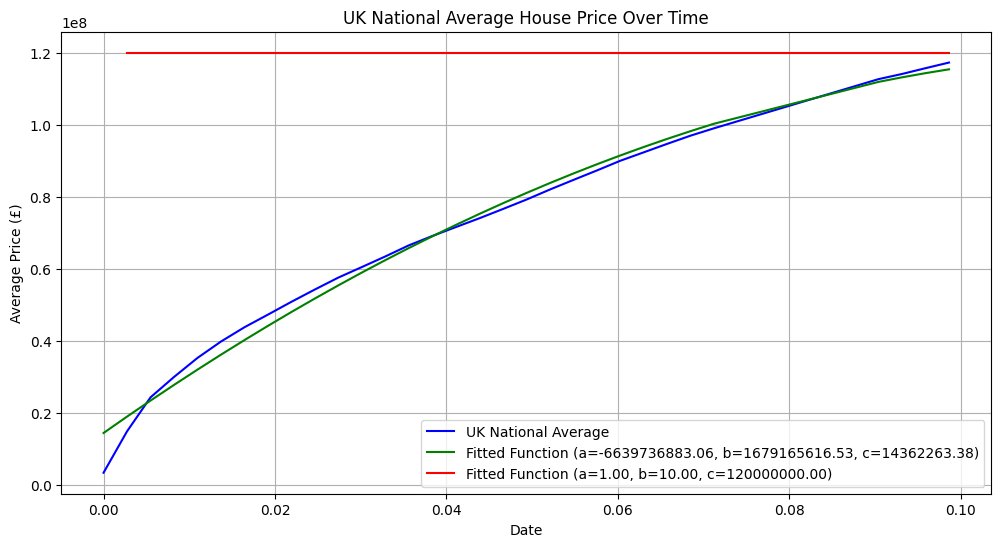

Fitted parameters: a=1.0000, b=10.0000, c=120000000.0000
Fitted parameters: a=-6639736883.0575, b=1679165616.5251, c=14362263.3783


In [ ]:
# Perform the non-linear regression using curve_fit
# Provide initial guess values for the parameters (optional but recommended)
initial_guesses = [-1, 0.1, 0]
quad_params, quad_covariance = curve_fit(quadratic, new_df.index, new_df.values, p0=initial_guesses)

# Extract the fitted parameters
quad_a_fit, quad_b_fit, quad_c_fit = quad_params

# 4. Generate the fitted curve
quad_y_fit = quadratic(new_df.index, quad_a_fit, quad_b_fit, quad_c_fit)


# Perform the non-linear regression using curve_fit
# Provide initial guess values for the parameters (optional but recommended)
initial_guesses = [1, 10, 0]
params, covariance = curve_fit(logarithmic, new_df.index, new_df.values, p0=initial_guesses)

# Extract the fitted parameters
a_fit, b_fit, c_fit = params

# 4. Generate the fitted curve
y_fit = logarithmic(new_df.index, a_fit, b_fit, c_fit)


# 5. Visualise the results
plt.figure(figsize=(12, 6))
plt.plot(new_df.index, new_df.values, label="UK National Average", color="blue")
# plt.scatter(new_df.index, new_df.values, label='Noisy Data', s=20, alpha=0.7)
# plt.plot(new_df.index, y_true, label='True Function (Ideal)', color='green', linestyle='--')
plt.plot(new_df.index, quad_y_fit, label=f'Fitted Function (a={quad_a_fit:.2f}, b={quad_b_fit:.2f}, c={quad_c_fit:.2f})', color='green')
plt.plot(new_df.index, y_fit, label=f'Fitted Function (a={a_fit:.2f}, b={b_fit:.2f}, c={c_fit:.2f})', color='red')
plt.xlabel("Date")
plt.ylabel("Average Price (£)")
# plt.title('Non-Linear Regression: Exponential Growth')
plt.title("UK National Average House Price Over Time")
plt.legend()
plt.grid(True)
plt.show()

print(f"Fitted parameters: a={a_fit:.4f}, b={b_fit:.4f}, c={c_fit:.4f}")
print(f"Fitted parameters: a={quad_a_fit:.4f}, b={quad_b_fit:.4f}, c={quad_c_fit:.4f}")
# print(f"True parameters: a={true_a:.4f}, b={true_b:.4f}, c={true_c:.4f}")

In [51]:
mask = full_df["video_id"] == "#NAME?"

# Keep all "#NAME?" rows untouched
name_df = full_df[mask]

# Apply deduplication only to the rest
cleaned_df = (
    full_df[~mask]
    .sort_values(by=["trending_date", "views", "likes"], ascending=False)
    .drop_duplicates(subset=["video_id", "trending_date"], keep="first")
)

# Combine back together
cleaned_df = pd.concat([cleaned_df, name_df], ignore_index=True)

# cleaned_df = (
#     full_df[full_df["video_id"] != "#NAME?"]  # filter out invalid IDs first
#     .sort_values(by=["trending_date", "views", "likes"], ascending=False)  
#     .drop_duplicates(subset=["video_id", "trending_date"], keep="first")  
#     .reset_index(drop=True)
# )

In [52]:
cleaned_df.shape

(325644, 20)

In [ ]:
# End of exploring

In [ ]:
# Write a sample of the cleaned and compiled data to a CSV file
full_df[0:1000].to_csv(os.path.join("..", "data", "export_data", "youtube_sample.csv"), index=False)

In [ ]:
# Write a sample of the cleaned and compiled data to a JSON file
full_df[0:1000].to_json(os.path.join("..", "data", "export_data", "youtube_sample.json"))

In [ ]:
from sqlalchemy import create_engine
engine = create_engine('sqlite:///'+os.path.join("..", "data", "export_data", "youtube_sample.sqlite"))

# Write a sample of the cleaned and compiled data to a SQLite database
full_df[0:1000].to_sql('Users', con=engine, if_exists='append')

In [12]:
# Category analysis

# Search dataframe for category column
full_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,SbOwzAl9ZfQ,17.14.11,CapÃ­tulo 12 | MasterChef 2017,MasterChef 2017,24,2017-11-13T06:06:22.000Z,"MasterChef Junior 2017|""TV Azteca""|""recetas""|""...",310130,4182,361,1836,https://i.ytimg.com/vi/SbOwzAl9ZfQ/default.jpg,False,False,False,Disfruta la presencia del Chef Torreblanca en ...
1,klOV6Xh-DnI,17.14.11,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...,Micky Contreras Martinez,22,2017-11-13T05:11:58.000Z,La Voz Mexico 7,104972,271,174,369,https://i.ytimg.com/vi/klOV6Xh-DnI/default.jpg,False,False,False,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...
2,6L2ZF7Qzsbk,17.14.11,LOUIS CKAGÃ - EL PULSO DE LA REPÃBLICA,El Pulso De La RepÃºblica,25,2017-11-13T17:00:02.000Z,"Chumel Torres|""El Pulso de la Republica""|""noti...",136064,10105,266,607,https://i.ytimg.com/vi/6L2ZF7Qzsbk/default.jpg,False,False,False,La canciÃ³n del principio se llama âEste esp...
3,hcY52MFWMDM,17.14.11,Sismo de 6.7 sacude Costa Rica 12 Noviembre 2017,Casanare,25,2017-11-13T03:47:10.000Z,"temblor|""costa rica""|""sismo en costa rica""",96153,378,171,208,https://i.ytimg.com/vi/hcY52MFWMDM/default.jpg,False,False,False,El video es de un Walmart en el pais centroame...
4,_OXDcGPVAa4,17.14.11,DOG HACKS | MUSAS LESSLIE LOS POLINESIOS,Musas,26,2017-11-13T19:17:48.000Z,"MUSAS|""lesslie""|""karen""|""hacks""|""perros""|""dogs...",499965,57781,681,7428,https://i.ytimg.com/vi/_OXDcGPVAa4/default.jpg,False,False,False,MI HERMANO NARRA MI RUTINA DE MAQUILLAJE\nhttp...


In [13]:
# Get unique category IDs
full_df["category_id"].unique()

array([24, 22, 25, 26, 10, 23, 17,  2,  1, 29, 27, 28, 20, 15, 19, 43, 30,
       44])

In [14]:
# Load JSON file containing category ID mappings
json_df = pd.read_json(os.path.join("..", "data", "additional_data", "US_category_id.json"))
json_df

,kind,etag,items
0,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
1,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
2,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
3,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
4,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
5,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
6,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
7,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
8,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
9,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."


In [15]:
# Sample items column
json_df["items"][0]

{'kind': 'youtube#videoCategory',
 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
 'id': '1',
 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
  'title': 'Film & Animation',
  'assignable': True}}

In [16]:
# Create a dictionary to map category IDs to category names
category_dict = {}

for item in json_df["items"].values:
    category_dict[int(item["id"])] = item["snippet"]["title"]

In [17]:
category_dict

{1: 'Film & Animation',
 2: 'Autos & Vehicles',
 10: 'Music',
 15: 'Pets & Animals',
 17: 'Sports',
 18: 'Short Movies',
 19: 'Travel & Events',
 20: 'Gaming',
 21: 'Videoblogging',
 22: 'People & Blogs',
 23: 'Comedy',
 24: 'Entertainment',
 25: 'News & Politics',
 26: 'Howto & Style',
 27: 'Education',
 28: 'Science & Technology',
 29: 'Nonprofits & Activism',
 30: 'Movies',
 31: 'Anime/Animation',
 32: 'Action/Adventure',
 33: 'Classics',
 34: 'Comedy',
 35: 'Documentary',
 36: 'Drama',
 37: 'Family',
 38: 'Foreign',
 39: 'Horror',
 40: 'Sci-Fi/Fantasy',
 41: 'Thriller',
 42: 'Shorts',
 43: 'Shows',
 44: 'Trailers'}

In [18]:
# Create a new column in the dataframe with category names
full_df["category_name"] = full_df["category_id"].map(category_dict)
full_df

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name
0,SbOwzAl9ZfQ,17.14.11,CapÃ­tulo 12 | MasterChef 2017,MasterChef 2017,24,2017-11-13T06:06:22.000Z,"MasterChef Junior 2017|""TV Azteca""|""recetas""|""...",310130,4182,361,1836,https://i.ytimg.com/vi/SbOwzAl9ZfQ/default.jpg,False,False,False,Disfruta la presencia del Chef Torreblanca en ...,Entertainment
1,klOV6Xh-DnI,17.14.11,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...,Micky Contreras Martinez,22,2017-11-13T05:11:58.000Z,La Voz Mexico 7,104972,271,174,369,https://i.ytimg.com/vi/klOV6Xh-DnI/default.jpg,False,False,False,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...,People & Blogs
2,6L2ZF7Qzsbk,17.14.11,LOUIS CKAGÃ - EL PULSO DE LA REPÃBLICA,El Pulso De La RepÃºblica,25,2017-11-13T17:00:02.000Z,"Chumel Torres|""El Pulso de la Republica""|""noti...",136064,10105,266,607,https://i.ytimg.com/vi/6L2ZF7Qzsbk/default.jpg,False,False,False,La canciÃ³n del principio se llama âEste esp...,News & Politics
3,hcY52MFWMDM,17.14.11,Sismo de 6.7 sacude Costa Rica 12 Noviembre 2017,Casanare,25,2017-11-13T03:47:10.000Z,"temblor|""costa rica""|""sismo en costa rica""",96153,378,171,208,https://i.ytimg.com/vi/hcY52MFWMDM/default.jpg,False,False,False,El video es de un Walmart en el pais centroame...,News & Politics
4,_OXDcGPVAa4,17.14.11,DOG HACKS | MUSAS LESSLIE LOS POLINESIOS,Musas,26,2017-11-13T19:17:48.000Z,"MUSAS|""lesslie""|""karen""|""hacks""|""perros""|""dogs...",499965,57781,681,7428,https://i.ytimg.com/vi/_OXDcGPVAa4/default.jpg,False,False,False,MI HERMANO NARRA MI RUTINA DE MAQUILLAJE\nhttp...,Howto & Style
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375937,l884wKofd54,18.14.06,Enrique Iglesias - MOVE TO MIAMI (Official Vid...,EnriqueIglesiasVEVO,10,2018-05-09T07:00:01.000Z,"Enrique Iglesias feat. Pitbull|""MOVE TO MIAMI""...",25066952,268088,12783,9933,https://i.ytimg.com/vi/l884wKofd54/default.jpg,False,False,False,NEW SONG - MOVE TO MIAMI feat. Pitbull (Click ...,Music
375938,IP8k2xkhOdI,18.14.06,Jacob Sartorius - Up With It (Official Music V...,Jacob Sartorius,10,2018-05-11T17:09:16.000Z,"jacob sartorius|""jacob""|""up with it""|""jacob sa...",1492219,61998,13781,24330,https://i.ytimg.com/vi/IP8k2xkhOdI/default.jpg,False,False,False,THE OFFICIAL UP WITH IT MUSIC VIDEO!Get my new...,Music
375939,Il-an3K9pjg,18.14.06,Anne-Marie - 2002 [Official Video],Anne-Marie,10,2018-05-08T11:05:08.000Z,"anne|""marie""|""anne-marie""|""2002""|""two thousand...",29641412,394830,8892,19988,https://i.ytimg.com/vi/Il-an3K9pjg/default.jpg,False,False,False,Get 2002 by Anne-Marie HERE â¶ http://ad.gt/2...,Music
375940,-DRsfNObKIQ,18.14.06,Eleni Foureira - Fuego - Cyprus - LIVE - First...,Eurovision Song Contest,24,2018-05-08T20:32:32.000Z,"Eurovision Song Contest|""2018""|""Lisbon""|""Cypru...",14317515,151870,45875,26766,https://i.ytimg.com/vi/-DRsfNObKIQ/default.jpg,False,False,False,Eleni Foureira represented Cyprus at the first...,Entertainment


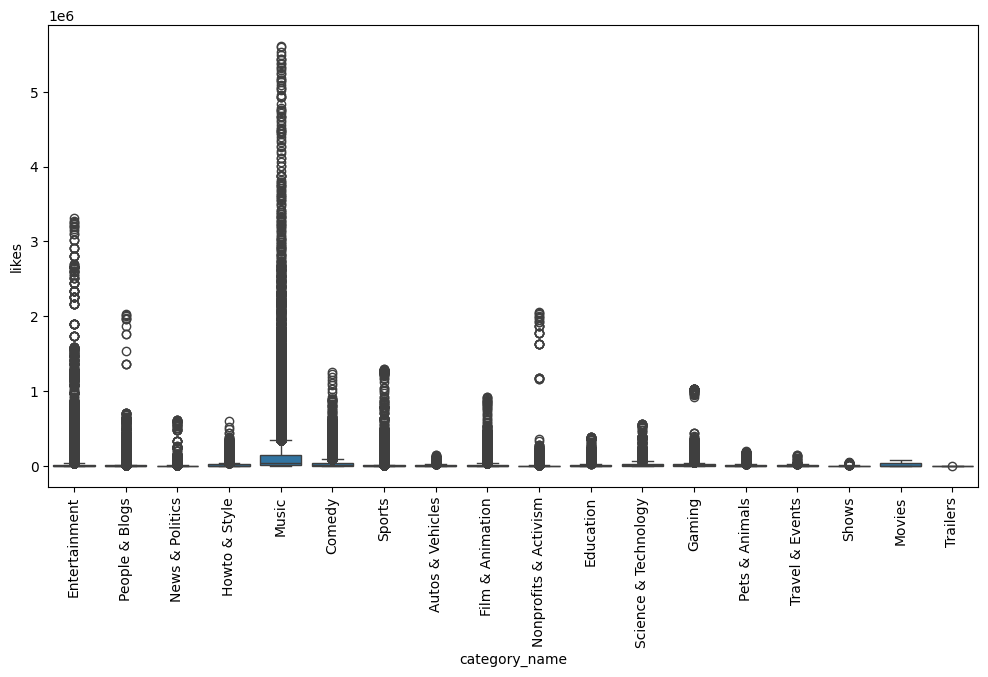

In [19]:
# Plot category distribution against likes using seaborn boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=full_df, x="category_name", y="likes")
plt.xticks(rotation="vertical")
plt.show()

In [20]:
# Engagement analysis

# Calculate engagement rates
full_df["like_rate"] = (full_df["likes"]/full_df["views"])*100
full_df["dislike_rate"] = (full_df["dislikes"]/full_df["views"])*100
full_df["comment_count_rate"] = (full_df["comment_count"]/full_df["views"])*100

In [21]:
full_df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'category_name', 'like_rate',
       'dislike_rate', 'comment_count_rate'],
      dtype='object')

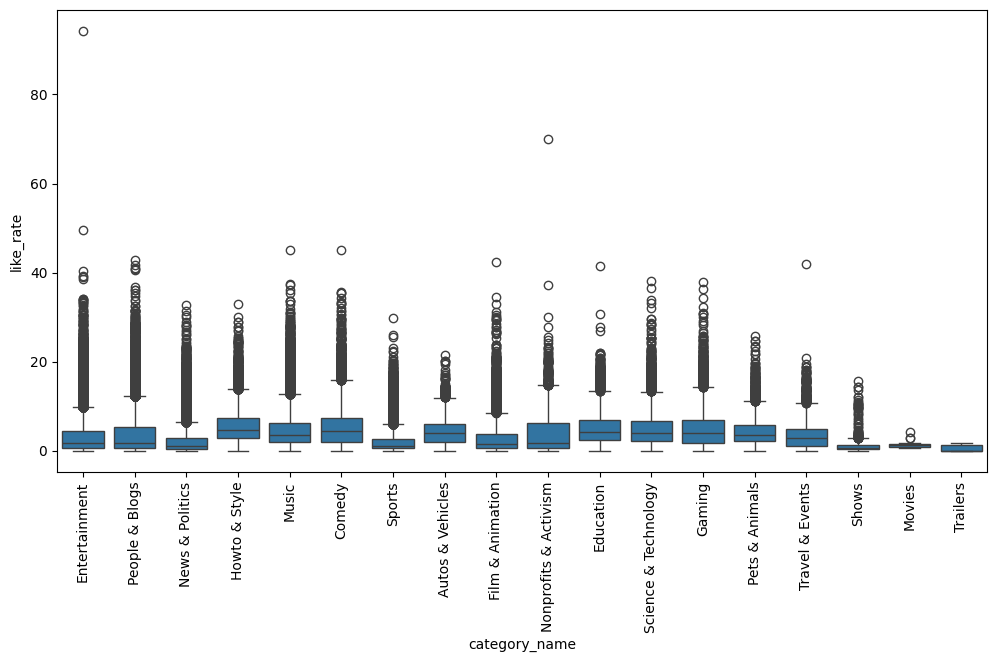

In [22]:
# Plot like rate against category using seaborn boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=full_df, x="category_name", y="like_rate")
plt.xticks(rotation="vertical")
plt.show()

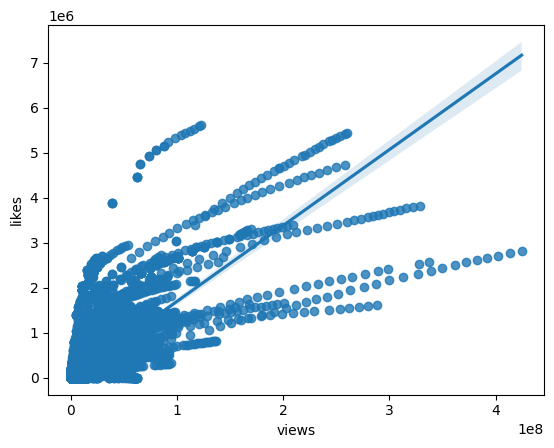

In [23]:
# Plot regression between views and likes using seaborn regplot
sns.regplot(data=full_df, x="views", y="likes")
plt.show()

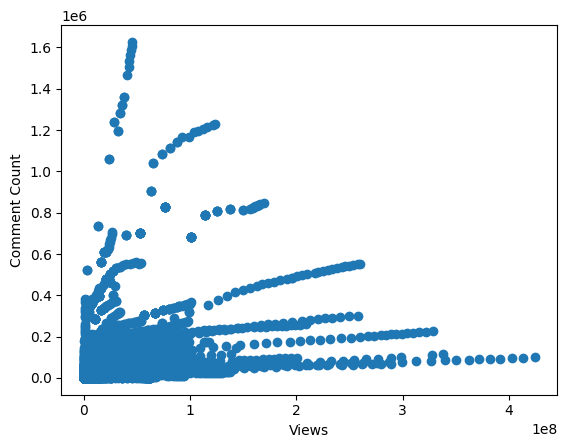

In [24]:
plt.scatter(full_df["views"], full_df["comment_count"])
plt.xlabel("Views")
plt.ylabel("Comment Count")
plt.show()

In [ ]:
# Show correlation matrix between views, likes, and dislikes
full_df[["views", "likes", "dislikes"]].corr()

In [ ]:
# Plot heatmap showing correlation matrix
sns.heatmap(full_df[["views", "likes", "dislikes"]].corr(), annot=True)
plt.show()

In [ ]:
# Channel analysis

# Search dataframe for channel_title column
full_df.head()


In [ ]:
# Create new dataframe showing number of videos per channel
cdf = full_df["channel_title"].value_counts().reset_index()
cdf

In [ ]:
cdf.rename(columns={"count": "total_videos"}, inplace=True)

In [ ]:
import plotly.express as px

In [ ]:
# Plot top 20 channels by number of videos using plotly
px.bar(cdf.head(20), x="channel_title", y="total_videos", title="Top 20 Channels by Number of Videos")

In [ ]:
# Punctuation analysis

# Preview first video title
full_df["title"][0]

In [ ]:
import string
string.punctuation

In [ ]:
# Create a function that returns the count of punctuation characters in a given text
def punctuation_count(text):
    return len([char for char in text if char in string.punctuation])

In [ ]:
# Apply the function to the title column and create a new column with the results
full_df["punctuation_count"] = full_df["title"].apply(punctuation_count)
full_df["punctuation_count"]

In [ ]:
# Plot boxplot of punctuation count against views using seaborn
plt.figure(figsize=(12, 6))
sns.boxplot(data=full_df, x="punctuation_count", y="views")
plt.show()

In [ ]:
# Plot boxplot of punctuation count against likes using seaborn
plt.figure(figsize=(12, 6))
sns.boxplot(data=full_df, x="punctuation_count", y="likes")
plt.show()